In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Import the 2016 Happiness File with Regions
file = "../Resources/whr_2016_regions.csv"
region_happiness_df = pd.read_csv(file)

file2 = "../Resources/whr_2016.csv"
ttest_df = pd.read_csv(file2)

region_happiness_df.head()

#ttest_df.head()

,Region,Region code,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
0,Australia and New Zealand,ANZ,8.500000,7.323500,1.402545,1.138770,0.841080
1,Central and Eastern Europe,CEE,78.448276,5.370690,1.047537,0.861855,0.631592
2,Eastern Asia,EA,67.166667,5.624167,1.277312,0.910428,0.806680
3,Latin America and Caribbean,LAC,48.333333,6.101750,0.993410,0.898432,0.612702
4,Middle East and Northern Africa,MENA,78.105263,5.386053,1.139323,0.695644,0.616438


In [3]:
ttest_region_index = ttest_df.set_index("Region")
#ttest_df['Region'].value_counts()
ttest_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [4]:
df_region_richhappiness = region_happiness_df[["Region","Region code","Happiness Score","Economy (GDP per Capita)",]]
df_region_richhappiness.head()

,Region,Region code,Happiness Score,Economy (GDP per Capita)
0,Australia and New Zealand,ANZ,7.323500,1.402545
1,Central and Eastern Europe,CEE,5.370690,1.047537
2,Eastern Asia,EA,5.624167,1.277312
3,Latin America and Caribbean,LAC,6.101750,0.993410
4,Middle East and Northern Africa,MENA,5.386053,1.139323


In [5]:
# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(df_region_richhappiness["Happiness Score"], df_region_richhappiness["Economy (GDP per Capita)"])
#y=mx+b
fit_economy = slope * df_region_richhappiness["Happiness Score"] + intercept
r_squared_economy = r_value**2
print(r_squared_economy)

0.8251803813956365


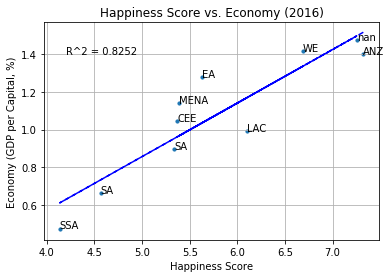

In [6]:
#Create a scatter plot for Happiness score and Economy
plt.scatter(df_region_richhappiness["Happiness Score"],df_region_richhappiness["Economy (GDP per Capita)"], marker = 'o', s=10)
plt.plot(df_region_richhappiness["Happiness Score"], fit_economy, 'b--')
#Format the chart
plt.title("Happiness Score vs. Economy (2016)")
plt.xlabel("Happiness Score")
plt.ylabel("Economy (GDP per Capital, %)")
plt.grid(True)
plt.text(4.2, 1.4, 'R^2 = ' + str(round(r_squared_economy, 4)))
for i, txt in enumerate(df_region_richhappiness["Happiness Score"]):
   plt.annotate(df_region_richhappiness["Region code"][i], (df_region_richhappiness["Happiness Score"][i], df_region_richhappiness["Economy (GDP per Capita)"][i]))

#Save the chart
plt.savefig("../outputs/region_Happiness_vs_Economy.png")

#Show the chart
plt.show()

In [7]:
df_region_familyhappiness = region_happiness_df[["Region","Region code","Happiness Score","Family",]]
df_region_familyhappiness.head()


,Region,Region code,Happiness Score,Family
0,Australia and New Zealand,ANZ,7.323500,1.138770
1,Central and Eastern Europe,CEE,5.370690,0.861855
2,Eastern Asia,EA,5.624167,0.910428
3,Latin America and Caribbean,LAC,6.101750,0.898432
4,Middle East and Northern Africa,MENA,5.386053,0.695644


In [8]:
# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(df_region_familyhappiness["Happiness Score"], df_region_familyhappiness["Family"])
#y=mx+b
fit_family = slope * df_region_familyhappiness["Happiness Score"] + intercept
r_squared_family = r_value**2
print(r_squared_family)

0.8786141880097997


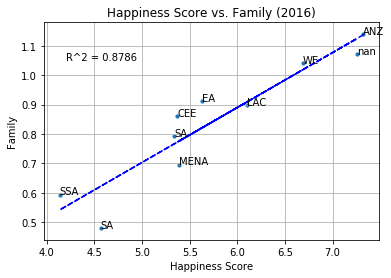

In [9]:
#Create a scatter plot for Happiness score and Family
plt.scatter(df_region_familyhappiness["Happiness Score"],df_region_familyhappiness["Family"], marker = 'o', s=10)
plt.plot(df_region_familyhappiness["Happiness Score"], fit_family, 'b--')

#Format the chart
plt.title("Happiness Score vs. Family (2016)")
plt.xlabel("Happiness Score")
plt.ylabel("Family")
plt.grid(True)
plt.text(4.2, 1.05, 'R^2 = ' + str(round(r_squared_family, 4)))
for i, txt in enumerate(df_region_familyhappiness["Happiness Score"]):
   plt.annotate(df_region_familyhappiness["Region code"][i], (df_region_familyhappiness["Happiness Score"][i], df_region_familyhappiness["Family"][i]))


#Save the chart
plt.savefig("../outputs/region_Happiness_vs_Family.png")

#Show the chart
plt.show()

In [10]:
df_region_healthhappiness = region_happiness_df[["Region","Region code","Happiness Score","Health (Life Expectancy)",]]
df_region_healthhappiness.head()

,Region,Region code,Happiness Score,Health (Life Expectancy)
0,Australia and New Zealand,ANZ,7.323500,0.841080
1,Central and Eastern Europe,CEE,5.370690,0.631592
2,Eastern Asia,EA,5.624167,0.806680
3,Latin America and Caribbean,LAC,6.101750,0.612702
4,Middle East and Northern Africa,MENA,5.386053,0.616438


In [11]:
# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(df_region_healthhappiness["Happiness Score"], df_region_healthhappiness["Health (Life Expectancy)"])
#y=mx+b
fit_health = slope * df_region_healthhappiness["Happiness Score"] + intercept
r_squared_health = r_value**2
print(r_squared_health)

0.7718460537250181


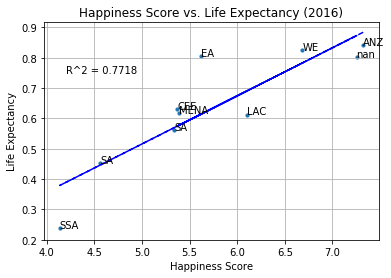

In [12]:
#Create a scatter plot for Happiness score and Life Expectancy
plt.scatter(df_region_healthhappiness["Happiness Score"],df_region_healthhappiness["Health (Life Expectancy)"], marker = 'o', s=10)
plt.plot(df_region_healthhappiness["Happiness Score"], fit_health, 'b--')

#Format the chart
plt.title("Happiness Score vs. Life Expectancy (2016)")
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.text(4.2, .75, 'R^2 = ' + str(round(r_squared_health, 4)))
for i, txt in enumerate(df_region_healthhappiness["Happiness Score"]):
   plt.annotate(df_region_healthhappiness["Region code"][i], (df_region_healthhappiness["Happiness Score"][i], df_region_healthhappiness["Health (Life Expectancy)"][i]))

#Save the chart
plt.savefig("../outputs/region_Happiness_vs_LifeExpectancy.png")

#Show the chart
plt.show()

In [13]:
# high_pop = ttest_region_index.loc['Australia and New Zealand']['Happiness Score']
# low_pop = ttest_region_index['Happiness Score']

In [14]:
# #null: the two means are the same
# #alternative: the two means are not equal to OR the mean of region 1 is greater than region 2  
# # ****divide p-score by two
# stats.ttest_1samp(high_pop, low_pop.mean())